<a href="https://colab.research.google.com/github/BerivanAyaz/Pusula_Berivan_Ayaz/blob/main/Pusula_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup and Data Loading**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os


# Refreshing the connection to resolve any possible connection issues
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive connected successfully.")
except Exception as e:
    print(f"An error occurred while connecting to Google Drive: {e}")

# Identifying and checking the file path
file_path = '/content/drive/MyDrive/pusula/Talent_Academy_Case_DT_2025.xlsx'

# section for debugging possible errors
parent_folder = os.path.dirname(file_path)
print(f"\n'{parent_folder}' checking the contents of the folder...")
try:
    file_list = os.listdir(parent_folder)
    print("Folder content:")
    for name in file_list:
        print(f"- {name}")
except FileNotFoundError:
    print(f"ERROR: '{parent_folder}' folder not found. Please check ('/content/drive/MyDrive/pusula/') the folder path.")


# Checking and reading data
if os.path.exists(file_path):
    print(f"\nFile found at path '{file_path}'. Reading data...")
    try:
        df = pd.read_excel(file_path, sheet_name=0)
        print("\nDataset loaded successfully!")

        print("\nFirst 5 Rows of the Data Set:")
        print(df.head())

    except Exception as e:
        print(f"\nAn error occurred while reading the file in Pandas: {e}")
        print("Check if the file is corrupt or in the correct format.")

else:
    print(f"\nERROR: File not found at path '{file_path}'!")


Mounted at /content/drive
Google Drive connected successfully.

'/content/drive/MyDrive/pusula' checking the contents of the folder...
Folder content:
- Talent_Academy_Case_DT_2025.xlsx
- Pusula_Case_Study.ipynb

File found at path '/content/drive/MyDrive/pusula/Talent_Academy_Case_DT_2025.xlsx'. Reading data...

Dataset loaded successfully!

First 5 Rows of the Data Set:
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

           

**Exploratory Data Analysis (EDA) - Overview and Health Check**

In [2]:
# --- Overview of the Data Set ---

# 1. The size of the dataset (number of rows, number of columns)
print("--- Dataset Size ---")
print(f"Number of Observations (Rows): {df.shape[0]}")
print(f"Number of Features (Columns): {df.shape[1]}")
print("-" * 25)


# 2. The data types of the columns and the counts of non-null values
print("\n--- Column Data Types and Null Values ---")
df.info()
print("-" * 25)


# 3. The number and percentage of missing data by column
print("\n--- Missing Data Analysis ---")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.concat([missing_data, missing_percent], axis=1, keys=['Number of Missing Data', 'Percentage of Missing Data (%)'])
print(missing_info[missing_info['Number of Missing Data'] > 0].sort_values(by='Number of Missing Data', ascending=False))
print("-" * 25)


# 4. Basic statistical information for numerical columns (mean, min, max, etc.).
print("\n--- Descriptive Statistics for Numerical Variables ---")
print(df.describe())
print("-" * 25)


# 5. The number of rows that are exactly the same
print("\n--- Number of Rows that are Exactly the Same ---")
print(f"There are a total of {df.duplicated().sum()} rows that are exactly the same.")
print("-" * 25)


--- Dataset Size ---
Number of Observations (Rows): 2235
Number of Features (Columns): 13
-------------------------

--- Column Data Types and Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
------

**Visualizing Core Features & Target**

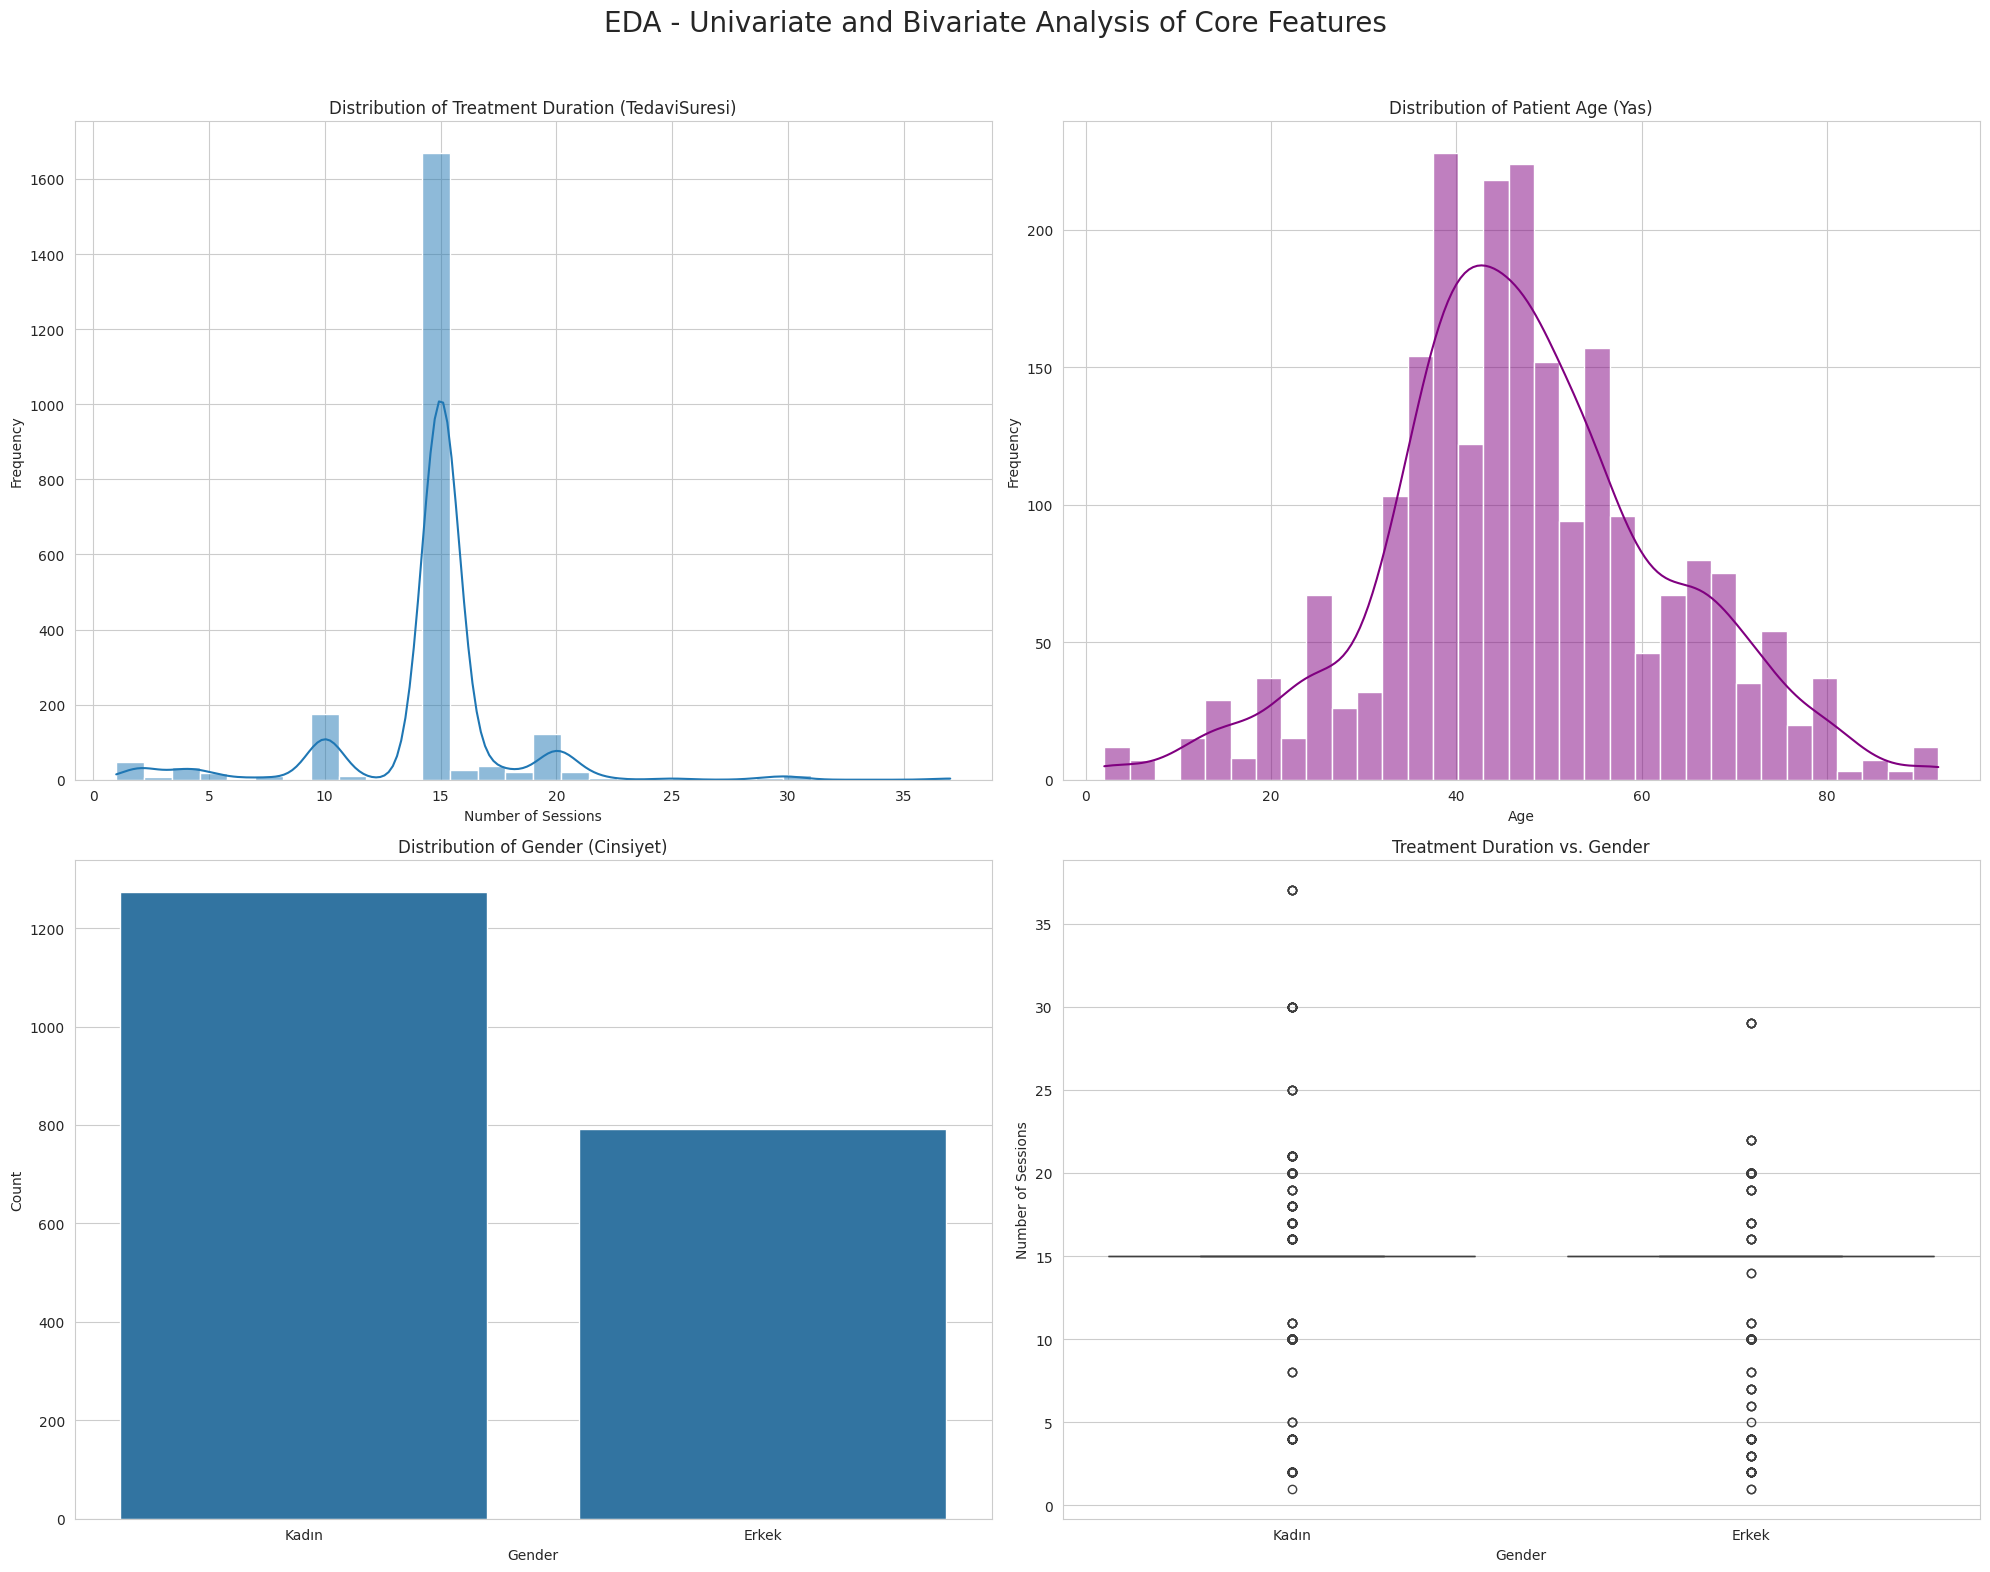

In [3]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 16))
plt.suptitle('EDA - Univariate and Bivariate Analysis of Core Features', fontsize=20)


# --- 1. Target Variable Analysis: TedaviSuresi ---
temp_tedavi_suresi = df['TedaviSuresi'].str.replace(' Seans', '').astype(int)

plt.subplot(2, 2, 1)
sns.histplot(temp_tedavi_suresi, kde=True, bins=30)
plt.title('Distribution of Treatment Duration (TedaviSuresi)')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')


# --- 2. Age Analysis ---
plt.subplot(2, 2, 2)
sns.histplot(df['Yas'], kde=True, color='purple')
plt.title('Distribution of Patient Age (Yas)')
plt.xlabel('Age')
plt.ylabel('Frequency')


# --- 3. Gender Analysis ---
plt.subplot(2, 2, 3)
sns.countplot(x='Cinsiyet', data=df[df['Cinsiyet'].notna()], order=df['Cinsiyet'].value_counts().index)
plt.title('Distribution of Gender (Cinsiyet)')
plt.xlabel('Gender')
plt.ylabel('Count')


# --- 4. Relationship between Gender and Treatment Duration ---
temp_df = pd.DataFrame({'Cinsiyet': df['Cinsiyet'], 'TedaviSuresi_Clean': temp_tedavi_suresi})
plt.subplot(2, 2, 4)
sns.boxplot(x='Cinsiyet', y='TedaviSuresi_Clean', data=temp_df[temp_df['Cinsiyet'].notna()])
plt.title('Treatment Duration vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Sessions')

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Analyzing High-Cardinality Features**

--- In-depth Analysis of Complex, Multi-Value Columns ---


/tmp/ipython-input-1873117935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
/tmp/ipython-input-1873117935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
/tmp/ipython-input-1873117935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
/tmp/ipython-input-1873117935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

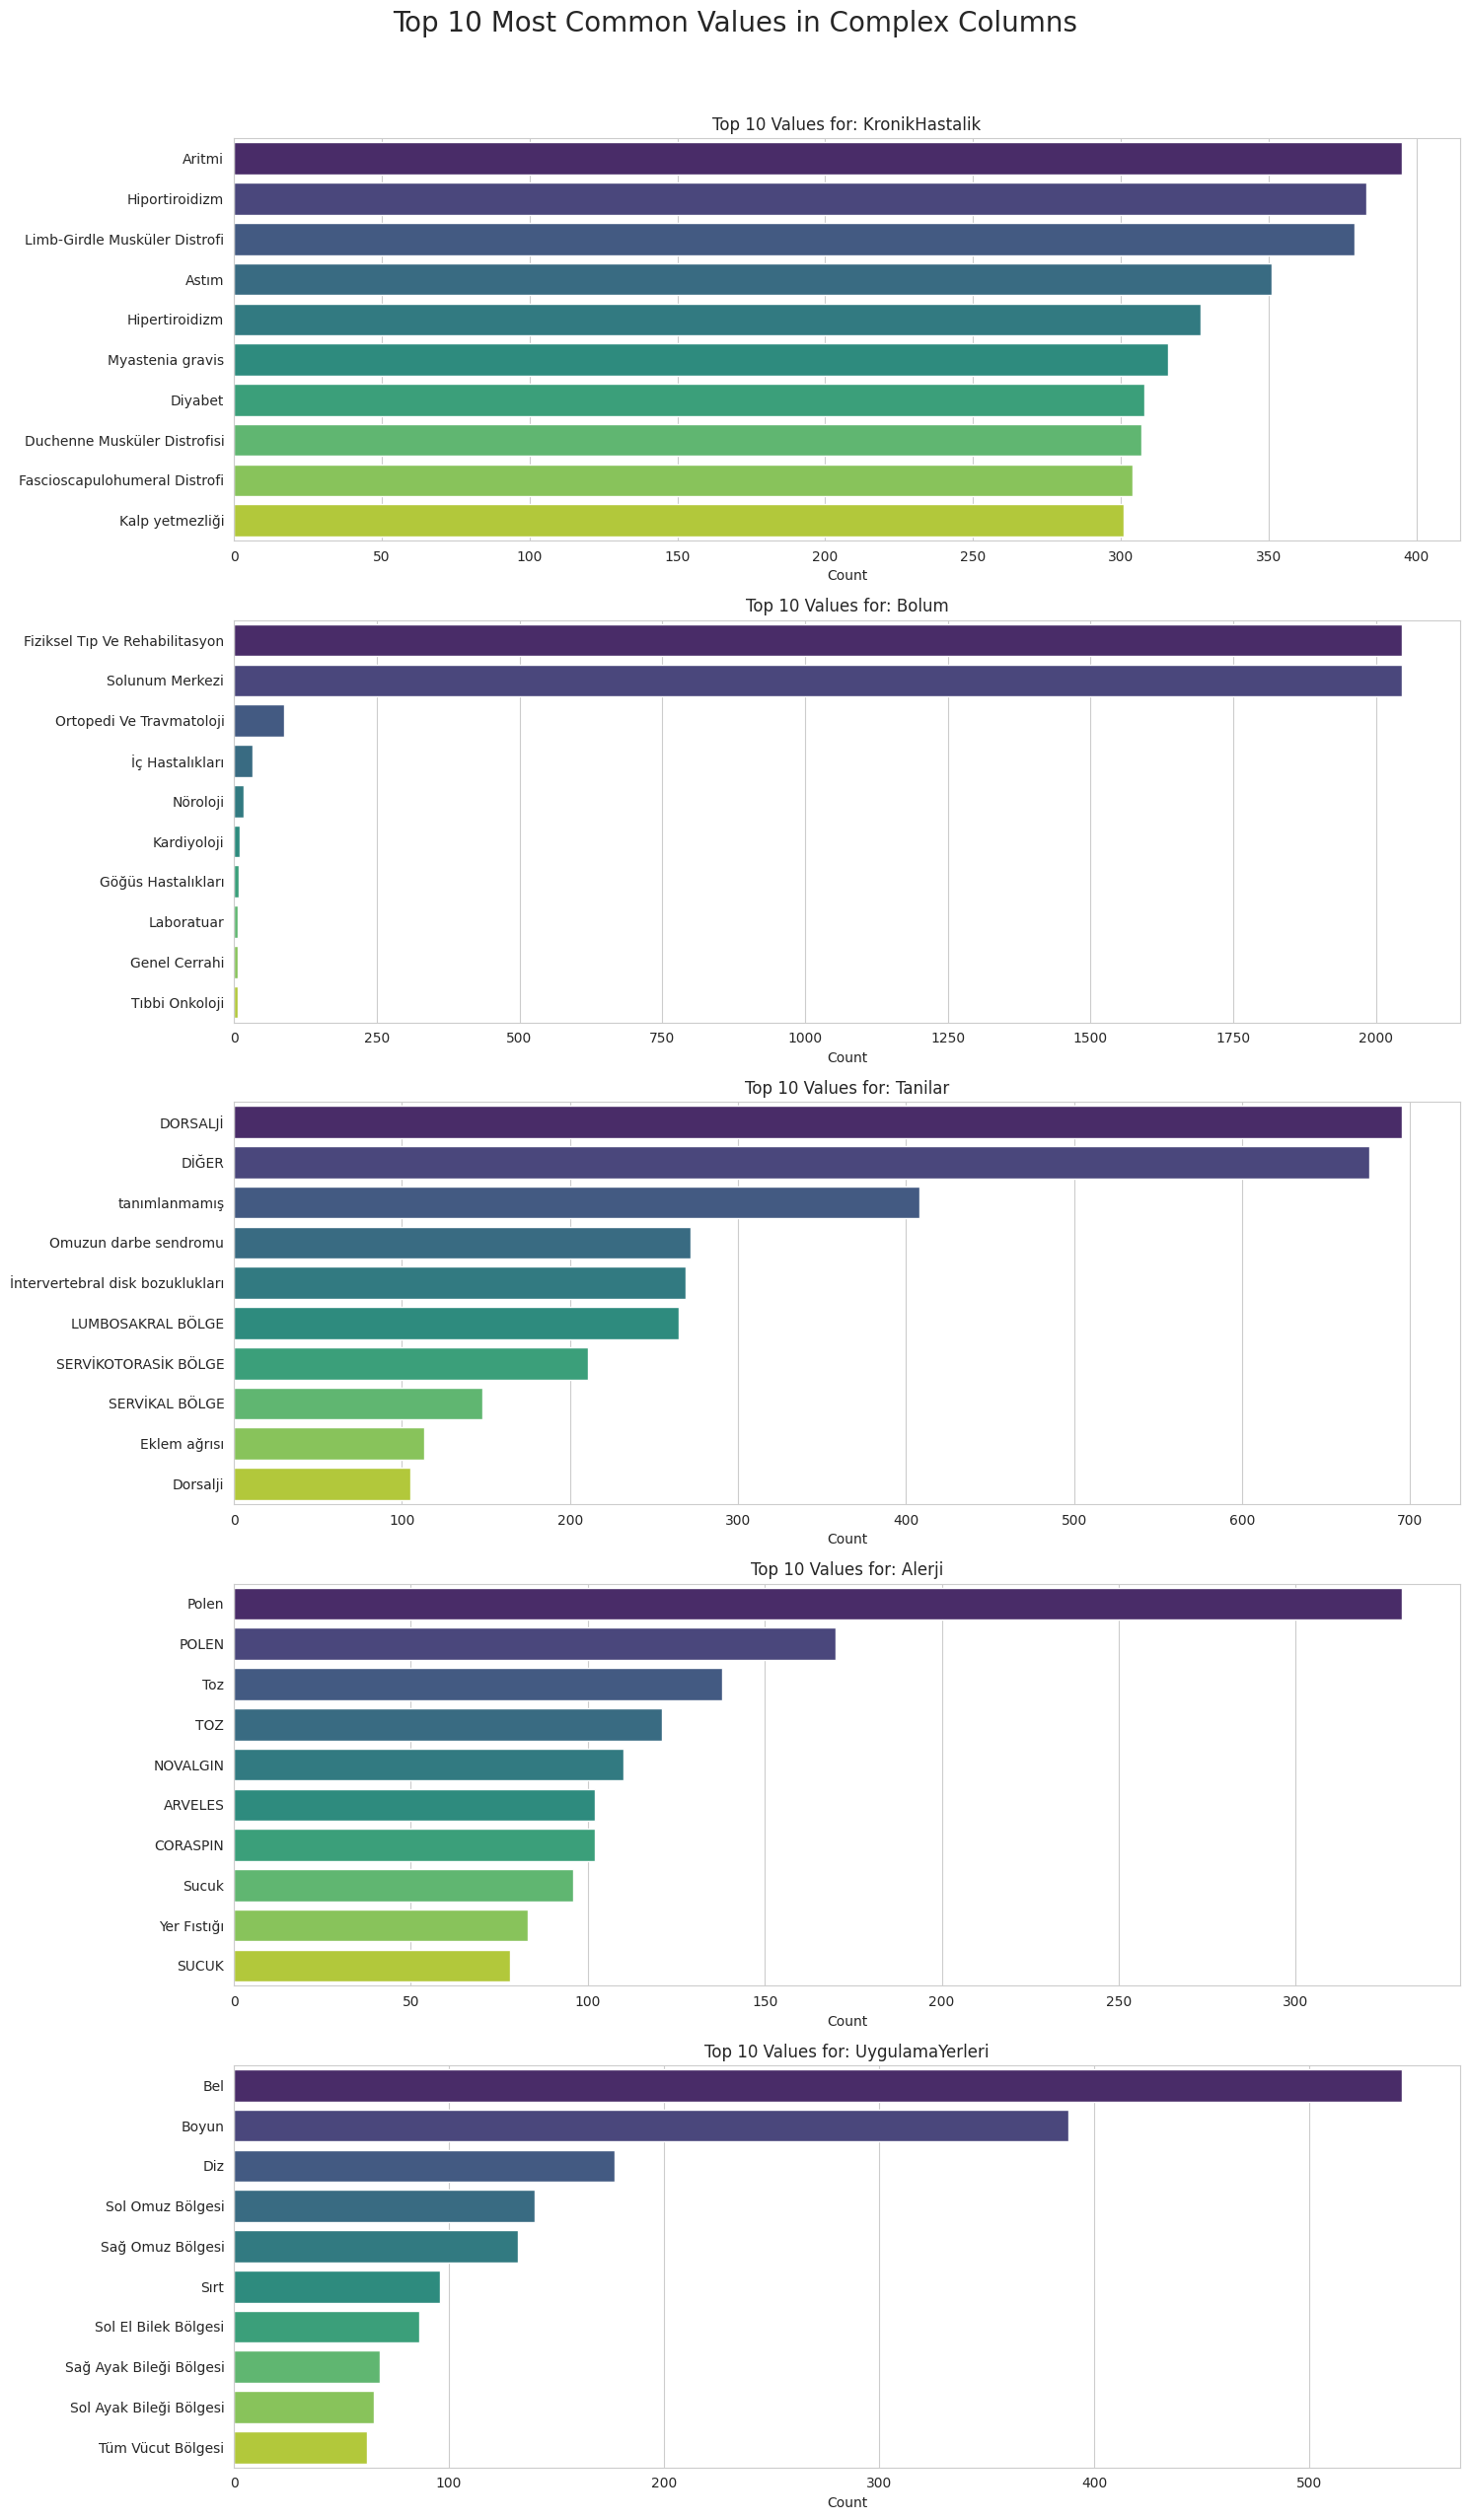

In [4]:
print("--- In-depth Analysis of Complex, Multi-Value Columns ---")

# Defining the list of columns we want to analyze
multi_value_columns = ['KronikHastalik', 'Bolum', 'Tanilar', 'Alerji', 'UygulamaYerleri']

# Creating a figure to hold all subplots
plt.figure(figsize=(15, 25))
plt.suptitle('Top 10 Most Common Values in Complex Columns', fontsize=20, y=1.02)

# Loop through each column to perform analysis and plot the results
for i, col in enumerate(multi_value_columns):
    plt.subplot(len(multi_value_columns), 1, i + 1)

    top_values = df[col].dropna().str.split(r',\s*').explode().str.strip().value_counts().nlargest(10)

    # --- Plotting Step ---
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')
    plt.title(f'Top 10 Values for: {col}')
    plt.xlabel('Count')
    plt.ylabel(None)

# Adjusting layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()

**Complex Features vs. Target Analysis**

--- Analyzing the Relationship Between Top Chronic Diseases and the Target Variable ---


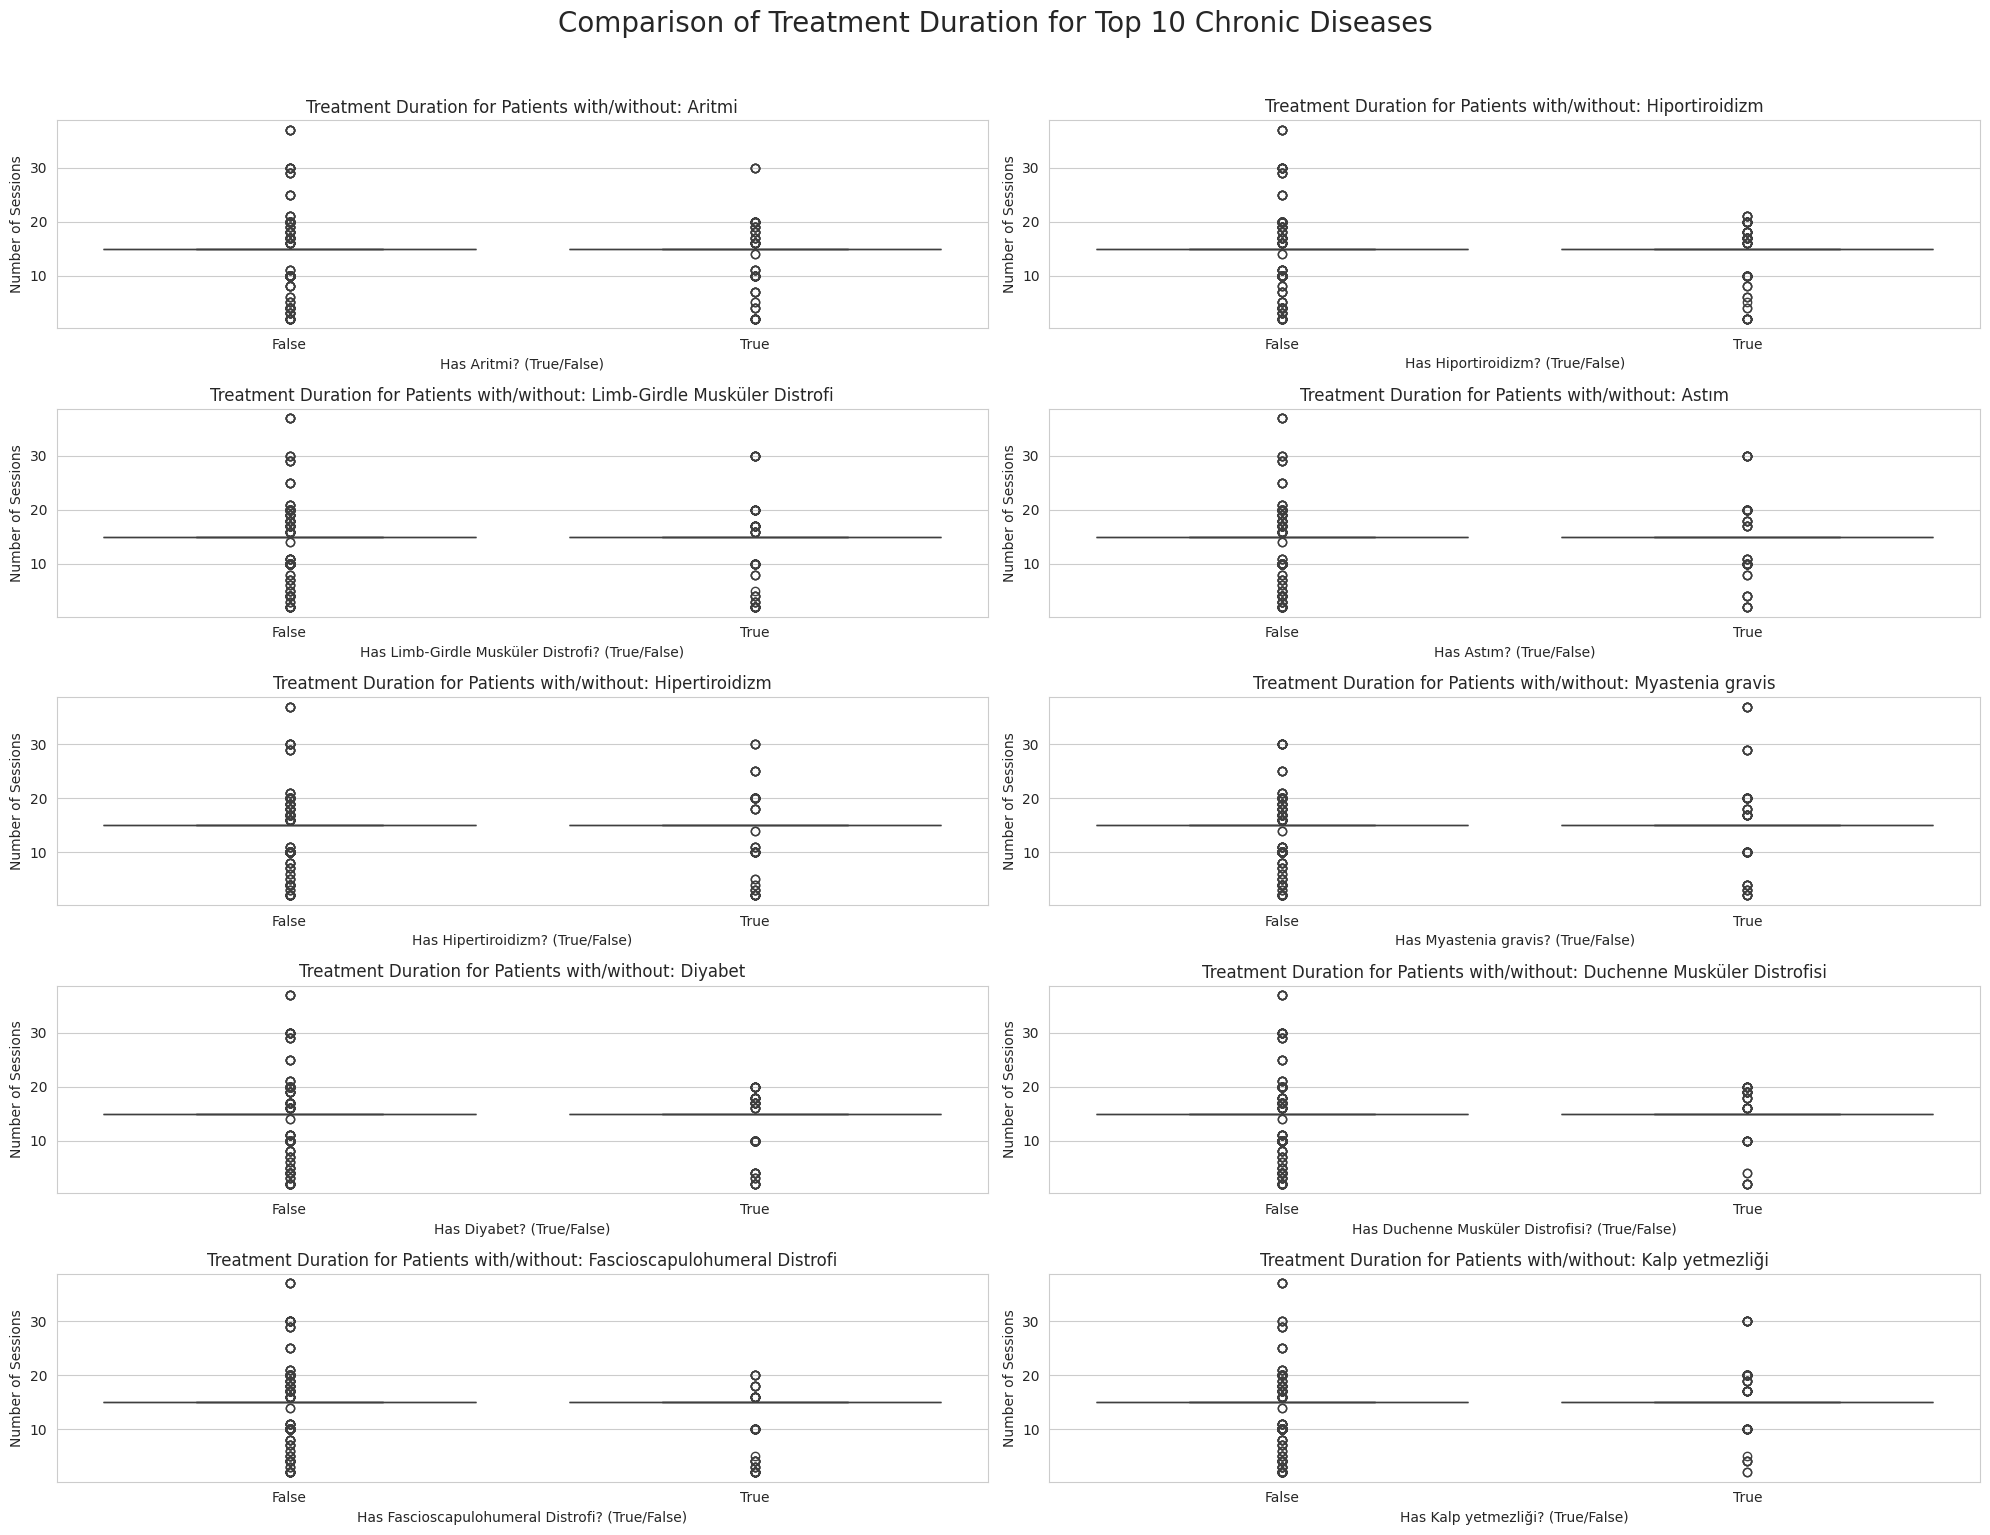

In [5]:
print("--- Analyzing the Relationship Between Top Chronic Diseases and the Target Variable ---")

df_analysis = df.copy()
df_analysis['TedaviSuresi_Clean'] = df['TedaviSuresi'].str.replace(' Seans', '').astype(int)

# --- Finding the Top 5-10 Most Common Chronic Diseases ---
try:
    top_10_diseases = df_analysis['KronikHastalik'].dropna().str.split(r',\s*').explode().str.strip().value_counts().nlargest(10).index.tolist()
except Exception as e:
    print(f"Could not process KronikHastalik, it might be all null. Error: {e}")
    top_10_diseases = []

# --- Creating plots to compare treatment duration for patients with and without these top diseases ---
if top_10_diseases:
    plt.figure(figsize=(20, 15))
    plt.suptitle('Comparison of Treatment Duration for Top 10 Chronic Diseases', fontsize=20, y=1.02)

    for i, disease in enumerate(top_10_diseases):
        plt.subplot(5, 2, i + 1)

        # Creating a temporary column that is True if the patient has the disease, False otherwise
        df_analysis['has_disease'] = df_analysis['KronikHastalik'].dropna().str.contains(disease, na=False)

        # Creating the boxplot
        sns.boxplot(x='has_disease', y='TedaviSuresi_Clean', data=df_analysis)
        plt.title(f'Treatment Duration for Patients with/without: {disease}')
        plt.xlabel(f'Has {disease}? (True/False)')
        plt.ylabel('Number of Sessions')

    plt.tight_layout()
    plt.show()
else:
    print("No chronic diseases found to analyze.")


**Regex-based Text Normalization & Type Conversion**

In [6]:
# Foundational Cleaning - Text Normalization and Type Conversion

print("--- Starting Foundational Cleaning ---")

df_clean = df.copy()

# --- 1. Text Normalization for all relevant object columns ---
text_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

print(f"Normalizing text columns: {text_cols}")
for col in text_cols:
    # Converting to string to handle potential non-string data, then apply normalization
    df_clean[col] = df_clean[col].astype(str).str.lower()
    df_clean[col] = df_clean[col].str.strip()
    df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)

# Replacing 'nan' string created from null values with a proper NaN object for consistency
df_clean.replace('nan', np.nan, inplace=True)


# --- 2. Data Type Conversion for Duration Columns ---
print("Converting duration columns to numeric type...")

# For TedaviSuresi (Target Variable)
df_clean['TedaviSuresi'] = pd.to_numeric(df_clean['TedaviSuresi'].str.extract(r'(\d+)', expand=False), errors='coerce')

# For UygulamaSuresi
df_clean['UygulamaSuresi'] = pd.to_numeric(df_clean['UygulamaSuresi'].str.extract(r'(\d+)', expand=False), errors='coerce')


# --- Verification ---
# Checking the result of my cleaning steps
print("\n--- Verification after Cleaning ---")
print("\nFirst 5 rows of the cleaned data:")
print(df_clean.head())

print("\nData types after conversion:")
df_clean.info()

--- Starting Foundational Cleaning ---
Normalizing text columns: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']
Converting duration columns to numeric type...

--- Verification after Cleaning ---

First 5 rows of the cleaned data:
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    kadın    0 rh+  türkiye   
1   145135   28    erkek    0 rh+  türkiye   
2   145135   28    erkek    0 rh+  türkiye   
3   145135   28    erkek    0 rh+  türkiye   
4   145135   28    erkek    0 rh+  türkiye   

                                      KronikHastalik  \
0  becker musküler distrofisi, hiportiroidizm, ka...   
1  duchenne musküler distrofisi, myastenia gravis...   
2  duchenne musküler distrofisi, myastenia gravis...   
3  duchenne musküler distrofisi, myastenia gravis...   
4  duchenne musküler distrofisi, myastenia gravis...   

                                            Bolum Alerji  \
0  fiziksel tıp ve rehabilit

**Engineering Features from Granular Data**

In [9]:
print("--- Consolidation and Feature Engineering ---")

# --- 1. First, I need to fix the inconsistency I found in 'KronikHastalik' ---
# My check revealed that some patients have different disease lists on different rows.
# My strategy is to combine all unique diseases for each patient into one master list.

print("Consolidating inconsistent 'KronikHastalik' entries for each patient...")

# I'll define a function to handle the aggregation logic.
def aggregate_unique_diseases(series):
    all_items = set()
    for item in series.dropna():
        all_items.update([s.strip() for s in item.split(',') if s.strip()])
    return ', '.join(sorted(list(all_items)))


consolidated_diseases = df_clean.groupby('HastaNo')['KronikHastalik'].transform(aggregate_unique_diseases)

df_clean['KronikHastalik'] = consolidated_diseases
print(">>> Consolidation complete. 'KronikHastalik' is now consistent for every patient.\n")


print("--- Re-running Data Consistency Check ---")
demographic_cols = ['Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Alerji']
inconsistencies_found = False
for col in demographic_cols:
    consistency_check = df_clean.groupby('HastaNo')[col].nunique()
    if (consistency_check > 1).any():
        print(f"!!! STILL INCONSISTENT IN COLUMN: {col} !!!")
        inconsistencies_found = True

if not inconsistencies_found:
    print(">>> Data Consistency Check Passed: Perfect! All demographic info is now consistent.\n")


# --- 2.Engineering new features from the application details ---
print("Engineering new aggregated features: 'ToplamUygulamaSuresi' and 'UygulamaBolgeSayisi'...")

plan_identifier = ['HastaNo', 'Tanilar', 'TedaviAdi', 'TedaviSuresi']

# Calculating the total application duration for each plan.
total_app_duration = df_clean.groupby(plan_identifier)['UygulamaSuresi'].sum().reset_index(name='ToplamUygulamaSuresi')

# Calculating the number of unique application sites for each plan (a measure of complexity).
num_app_sites = df_clean.groupby(plan_identifier)['UygulamaYerleri'].nunique().reset_index(name='UygulamaBolgeSayisi')


# --- 3. Merging these new features back into my main dataframe ---
print("Merging the new features back into the main dataframe...")
df_featured = pd.merge(df_clean, total_app_duration, on=plan_identifier, how='left')
df_featured = pd.merge(df_featured, num_app_sites, on=plan_identifier, how='left')
print(">>> Merge complete.\n")


# --- Final Verification ---
print("--- Final Check --")
print("First 5 rows with the new features added:")
# I'm adding the new columns to the end of the display list to make them easy to see.
display_cols = df_featured.columns.tolist()
print(df_featured[display_cols].head())

--- Consolidation and Feature Engineering ---
Consolidating inconsistent 'KronikHastalik' entries for each patient...
>>> Consolidation complete. 'KronikHastalik' is now consistent for every patient.

--- Re-running Data Consistency Check ---
>>> Data Consistency Check Passed: Perfect! All demographic info is now consistent.

Engineering new aggregated features: 'ToplamUygulamaSuresi' and 'UygulamaBolgeSayisi'...
Merging the new features back into the main dataframe...
>>> Merge complete.

--- Final Check --
First 5 rows with the new features added:
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    kadın    0 rh+  türkiye   
1   145135   28    erkek    0 rh+  türkiye   
2   145135   28    erkek    0 rh+  türkiye   
3   145135   28    erkek    0 rh+  türkiye   
4   145135   28    erkek    0 rh+  türkiye   

                                      KronikHastalik  \
0  becker musküler distrofisi, hiportiroidizm, ka...   
1  becker musküler distrofisi, duchenne musküler ...   

In [11]:
df_featured

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,ToplamUygulamaSuresi,UygulamaBolgeSayisi
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5,ayak bileği,20,20.0,1.0
1,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,20,85.0,2.0
2,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,"boyun,sırt",20,85.0,2.0
3,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,5,85.0,2.0
4,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,"boyun,sırt",20,85.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,erkek,NaN,türkiye,"aritmi, fascioscapulohumeral distrofi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15,sol el bilek bölgesi,10,70.0,1.0
2231,145536,48,erkek,NaN,türkiye,"aritmi, fascioscapulohumeral distrofi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15,sol el bilek bölgesi,20,70.0,1.0
2232,145537,33,kadın,a rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,​algonörodistrofi,​ ay...",aşil rüptürü rehabilitasyonu,15,sol ayak bileği bölgesi,20,20.0,1.0
2233,145537,33,kadın,a rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,algonörodistrofi, ayak...",aşil rüptürü rehabilitasyonu,15,sol ayak bileği bölgesi,15,20.0,1.0


**Smart Deduplication to Create the Final Analysis Set**

In [12]:
# I'll be working with the df_featured dataframe, which contains my newly engineered features.
print(f"Number of rows before deduplication: {len(df_featured)}")

# My defined subset of columns that uniquely identifies a treatment plan.
plan_identifier = ['HastaNo', 'Tanilar', 'TedaviAdi', 'TedaviSuresi']

# Dropping duplicate rows based on the plan identifier.
# I'm using keep='first' to retain the first occurrence of each unique plan.
# This ensures that I have one clean row for each distinct treatment plan.
df_final = df_featured.drop_duplicates(subset=plan_identifier, keep='first').copy()

print(f"Number of rows after deduplication: {len(df_final)}")
print(f"Total number of unique treatment plans identified: {len(df_final)}")
print(f"Number of redundant application detail rows removed: {len(df_featured) - len(df_final)}")


# --- Verification ---
print("\n--- Verification after Deduplication ---")
# The ultimate test: let's check our example patient '145135' again.
# This time, I expect to see only a single row.
print("\nChecking example patient '145135' in the new 'df_final' dataframe:")
# I'm displaying the key columns plus my new features to see the final result.
verification_cols = ['HastaNo', 'TedaviSuresi', 'ToplamUygulamaSuresi', 'UygulamaBolgeSayisi']
print(df_final[df_final['HastaNo'] == 145135][verification_cols])

print("\nFirst 5 rows of the final, deduplicated data:")
print(df_final.head())

Number of rows before deduplication: 2235
Number of rows after deduplication: 618
Total number of unique treatment plans identified: 618
Number of redundant application detail rows removed: 1617

--- Verification after Deduplication ---

Checking example patient '145135' in the new 'df_final' dataframe:
   HastaNo  TedaviSuresi  ToplamUygulamaSuresi  UygulamaBolgeSayisi
1   145135            15                  85.0                  2.0

First 5 rows of the final, deduplicated data:
    HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0    145134   60    kadın    0 rh+  türkiye   
1    145135   28    erkek    0 rh+  türkiye   
6    145136   60    erkek    0 rh+  türkiye   
9    145137   65    kadın    0 rh+  türkiye   
15   145137   65    kadın    0 rh+  türkiye   

                                       KronikHastalik  \
0   becker musküler distrofisi, hiportiroidizm, ka...   
1   becker musküler distrofisi, duchenne musküler ...   
6                                                       
9

In [13]:
df_final

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,ToplamUygulamaSuresi,UygulamaBolgeSayisi
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5,ayak bileği,20,20.0,1.0
1,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,20,85.0,2.0
6,145136,60,erkek,0 rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10,NaN,30,70.0,0.0
9,145137,65,kadın,0 rh+,türkiye,"diyabet, duchenne musküler distrofisi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi",novalgin,"artroz, tanımlanmamış, el",el rehabilitasyonu,15,sol el bilek bölgesi,15,95.0,1.0
15,145137,65,kadın,0 rh+,türkiye,"diyabet, duchenne musküler distrofisi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi",novalgin,"artroz, tanımlanmamış, el",el rehabilitasyonu-el rehabilitasyonu,15,sol el bilek bölgesi,20,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,145534,31,kadın,NaN,türkiye,limb-girdle musküler distrofi,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,voltaren","dorsalji̇, di̇ğer, lumbosakral bölge",dorsalji-bel,15,bel,20,85.0,1.0
2223,145535,52,kadın,NaN,türkiye,hipertansiyon,"fiziksel tıp ve rehabilitasyon,solunum merkezi",polen,omuzun darbe sendromu,sol omuz i̇mpingement,15,sol omuz bölgesi,20,85.0,1.0
2228,145536,48,erkek,NaN,türkiye,"aritmi, fascioscapulohumeral distrofi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,15,sol el bilek bölgesi,20,70.0,1.0
2232,145537,33,kadın,a rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,​algonörodistrofi,​ ay...",aşil rüptürü rehabilitasyonu,15,sol ayak bileği bölgesi,20,20.0,1.0


### **Analysis of Deduplication Results and a New Finding**

The initial deduplication in the previous step successfully reduced the dataset from 2235 to 618 rows. The check on patient `145135` confirms that the general logic is working.

However, a closer look at the output reveals a critical data inconsistency: patient `145137` still appears in two rows.

Upon investigation, the cause was identified in the `TedaviAdi` column:
- Row 1: `el rehabilitasyonu`
- Row 2: `el rehabilitasyonu-el rehabilitasyonu`

Because these two strings are not identical, the `drop_duplicates` function treated them as two separate, unique treatment plans. This is a data entry error that needs to be corrected.

The next cell will address this by applying an advanced cleaning function to standardize such patterns before re-applying the deduplication logic.

**Advanced Cleaning and Final Deduplication**

In [14]:
# --- 1. Applying the Advanced Cleaning Function ---
# I'll work on the 'df_featured' dataframe, which is the state before the faulty deduplication.
print("Applying advanced cleaning to 'TedaviAdi' column...")

def clean_duplicated_pattern(text):
    if isinstance(text, str):
        parts = text.split('-')
        if len(parts) == 2 and parts[0].strip() == parts[1].strip():
            return parts[0].strip()
    return text

df_advanced_clean = df_featured.copy()
df_advanced_clean['TedaviAdi'] = df_advanced_clean['TedaviAdi'].apply(clean_duplicated_pattern)
print(">>> Advanced cleaning complete.")


print("\nRe-running the deduplication process on the cleaned data...")
plan_identifier = ['HastaNo', 'Tanilar', 'TedaviAdi', 'TedaviSuresi']
df_final = df_advanced_clean.drop_duplicates(subset=plan_identifier, keep='first').copy()

print(f"Number of rows after FINAL deduplication: {len(df_final)}")
print(f"Number of redundant rows removed: {len(df_advanced_clean) - len(df_final)}")


# --- Final Verification ---
print("\n--- Final Verification ---")
print("Let's check patient '145137' one last time in the new 'df_final' dataframe:")
# Now, I expect to see only a single row for this patient as well.
verification_cols = ['HastaNo', 'Tanilar', 'TedaviAdi', 'TedaviSuresi']
print(df_final[df_final['HastaNo'] == 145137][verification_cols])

Applying advanced cleaning to 'TedaviAdi' column...
>>> Advanced cleaning complete.

Re-running the deduplication process on the cleaned data...
Number of rows after FINAL deduplication: 617
Number of redundant rows removed: 1618

--- Final Verification ---
Let's check patient '145137' one last time in the new 'df_final' dataframe:
    HastaNo                    Tanilar                        TedaviAdi  \
9    145137  artroz, tanımlanmamış, el               el rehabilitasyonu   
16   145137         trokanterik bursit  kalça ağrısı+trokanterik bursit   

    TedaviSuresi  
9             15  
16            15  


In [25]:
df_final.head(20)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,ToplamUygulamaSuresi,UygulamaBolgeSayisi
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hiportiroidizm, ka...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,5,ayak bileği,20,20.0,1.0
1,145135,28,erkek,0 rh+,türkiye,"becker musküler distrofisi, duchenne musküler ...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,15,boyun,20,85.0,2.0
6,145136,60,erkek,0 rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi","polen,novalgin",parapleji ve tetrapleji,parapleji,10,NaN,30,70.0,0.0
9,145137,65,kadın,0 rh+,türkiye,"diyabet, duchenne musküler distrofisi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi",novalgin,"artroz, tanımlanmamış, el",el rehabilitasyonu,15,sol el bilek bölgesi,15,95.0,1.0
16,145137,65,kadın,0 rh+,türkiye,"diyabet, duchenne musküler distrofisi, hiporti...","fiziksel tıp ve rehabilitasyon,solunum merkezi",novalgin,trokanterik bursit,kalça ağrısı+trokanterik bursit,15,kalça,20,75.0,1.0
21,145138,61,kadın,a rh+,türkiye,"diyabet, duchenne musküler distrofisi, fascios...","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,eklem ağrısı,gonartroz-meniskopati,18,diz,20,75.0,1.0
26,145139,52,kadın,a rh+,türkiye,"aritmi, diyabet, myastenia gravis","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,bisipital tendinit,sol omuz impingement,15,sol omuz bölgesi,5,85.0,1.0
31,145139,52,kadın,a rh+,türkiye,"aritmi, diyabet, myastenia gravis","fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"bisipital tendinit,omuzun darbe sendromu",sol omuz i̇mpingement,15,sol omuz bölgesi,5,85.0,1.0
36,145140,48,kadın,a rh+,türkiye,diyabet,"fiziksel tıp ve rehabilitasyon,solunum merkezi",NaN,"dorsalji̇, di̇ğer, servi̇kotorasi̇k bölge",dorsalji -boyun+trapez,15,boyun,20,85.0,1.0
41,145141,46,kadın,0 rh+,türkiye,,"fiziksel tıp ve rehabilitasyon,solunum merkezi",polen,"lenfödem, başka yerde sınıflanmamış,ekstremite...",lenfödem+ekstremite ağrısı,15,NaN,30,105.0,1.0
